In [37]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import tensorflow.keras.backend as K

In [5]:
from tensorflow.keras.datasets import mnist

In [116]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

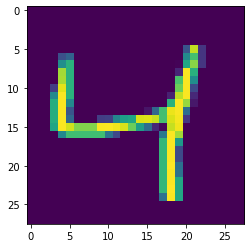

In [117]:
plt.imshow(X_train[2])

In [17]:
### The number of classes, this is really important
CLS = len(np.unique(y_train))

In [79]:
2**8

256

In [118]:
X_train = X_train/255.0
X_test = X_test/255.0  #### very important trick---normalize your inputs!!!!!!!!!!!

In [139]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.activations import softmax, relu
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential, Model  ### Model is used for functional api

In [120]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, sparse_categorical_crossentropy, categorical_crossentropy
from tensorflow.keras.metrics import Accuracy, Recall, FalsePositives, FalseNegatives

In [129]:
model = Sequential([
    Flatten(),
    Dropout(0.4),
    Dense(200, activation = "relu", ),
    Dropout(0.2),
    Dense(15, activation = "relu"),
    Dense(CLS, activation = "softmax") ###CLs = 10
])   #####This way of creating models limits you to toy models.

In [130]:
model.compile(optimizer = RMSprop(), loss = sparse_categorical_crossentropy, metrics = ["accuracy"])

In [131]:
model.fit(X_train, y_train,  batch_size = 64, epochs = 5, validation_data=(X_test, y_test))

Epoch 1/5
938/938 [==============================] - 8s 8ms/step - loss: 0.8974 - accuracy: 0.7111 - val_loss: 0.3412 - val_accuracy: 0.9070
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.5325 - accuracy: 0.8323 - val_loss: 0.2767 - val_accuracy: 0.9191
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: 0.4763 - accuracy: 0.8508 - val_loss: 0.2518 - val_accuracy: 0.9246
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.4492 - accuracy: 0.8595 - val_loss: 0.2389 - val_accuracy: 0.9301
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.4364 - accuracy: 0.8629 - val_loss: 0.2304 - val_accuracy: 0.9337


In [136]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [146]:
I = Input(shape = (28,28))
f = Flatten()(I)
y = Dense(100, "relu")(f)
x = Dropout(0.2)(y)
x = Dense(150, "relu")(x)
x = Dropout(0.2)(x)
x = Dense(100, "relu")(x)
x += y
x = Dense(10, "softmax")(x)

In [147]:
model = Model(I, x)

In [154]:
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [148]:
model.compile(optimizer = RMSprop(), loss = sparse_categorical_crossentropy, metrics = ["accuracy"])
model.fit(X_train, y_train,  batch_size = 64, epochs = 5, validation_data=(X_test, y_test))

Epoch 1/5
938/938 [==============================] - 8s 8ms/step - loss: 0.2863 - accuracy: 0.9144 - val_loss: 0.1462 - val_accuracy: 0.9516
Epoch 2/5
938/938 [==============================] - 5s 6ms/step - loss: 0.1363 - accuracy: 0.9596 - val_loss: 0.1021 - val_accuracy: 0.9689
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.1044 - accuracy: 0.9689 - val_loss: 0.0849 - val_accuracy: 0.9752
Epoch 4/5
938/938 [==============================] - 12s 12ms/step - loss: 0.0856 - accuracy: 0.9736 - val_loss: 0.0825 - val_accuracy: 0.9766
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0758 - accuracy: 0.9770 - val_loss: 0.0840 - val_accuracy: 0.9761


In [149]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_12 (Flatten)           (None, 784)          0           ['input_3[0][0]']                
                                                                                                  
 dense_42 (Dense)               (None, 100)          78500       ['flatten_12[0][0]']             
                                                                                                  
 dropout_5 (Dropout)            (None, 100)          0           ['dense_42[0][0]']               
                                                                                            